In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/vega/vega/master/docs/data/seattle-weather.csv")
dataset.shape

(1461, 6)

In [3]:
dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Simple regression. X = temp_min, y = temp_max

In [4]:
dataset.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


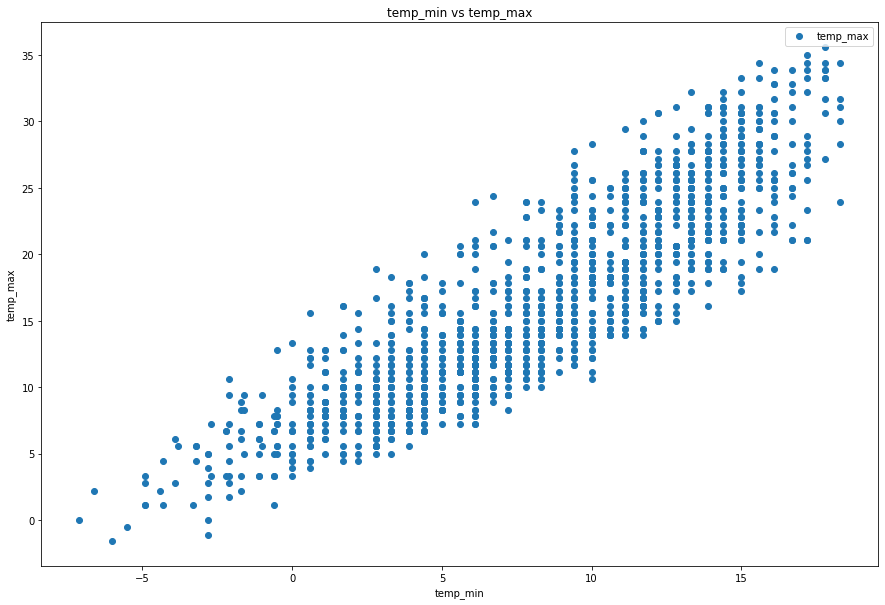

In [5]:
# this code make plot larger
plt.rcParams['figure.figsize'] = [15, 10]

# this code plot data
dataset.plot(x='temp_min', y='temp_max', style='o')  
plt.title('temp_min vs temp_max')  
plt.xlabel('temp_min')  
plt.ylabel('temp_max')  
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


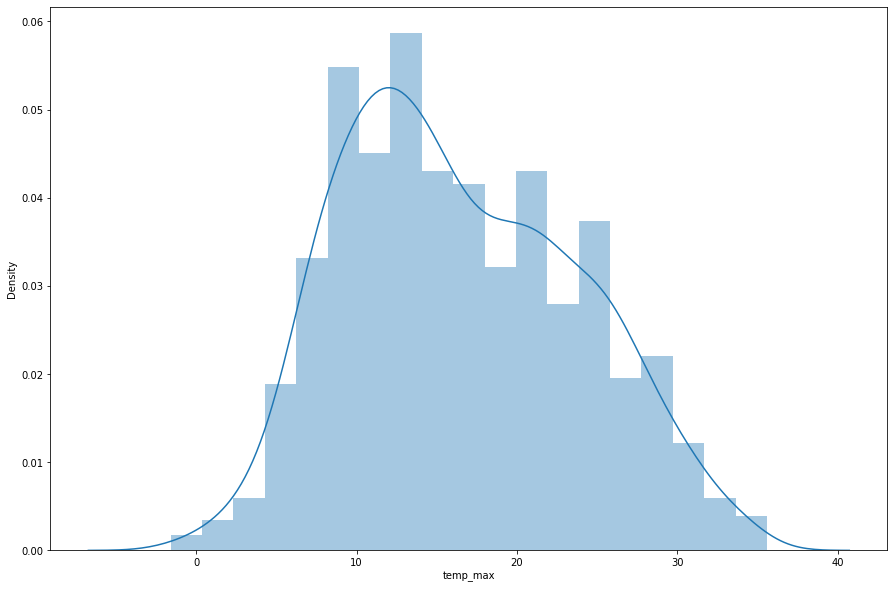

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['temp_max'])

In [7]:
# create independet variable
X = dataset['temp_min'].values.reshape(-1,1)
y = dataset['temp_max'].values.reshape(-1,1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[5.91368012]
[[1.28096891]]


In [11]:
y_pred_l = regressor.predict(X_test)

In [12]:
# Now compare the actual output values for X_test with the predicted values, execute the following script:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_l.flatten()})
df

,Actual,Predicted
0,20.0,21.541501
1,10.6,15.905238
2,14.4,18.723369
3,23.9,15.905238
4,12.8,15.136656
...,...,...
142,21.7,17.314303
143,27.2,23.719148
144,23.3,20.132435
145,12.8,14.496172


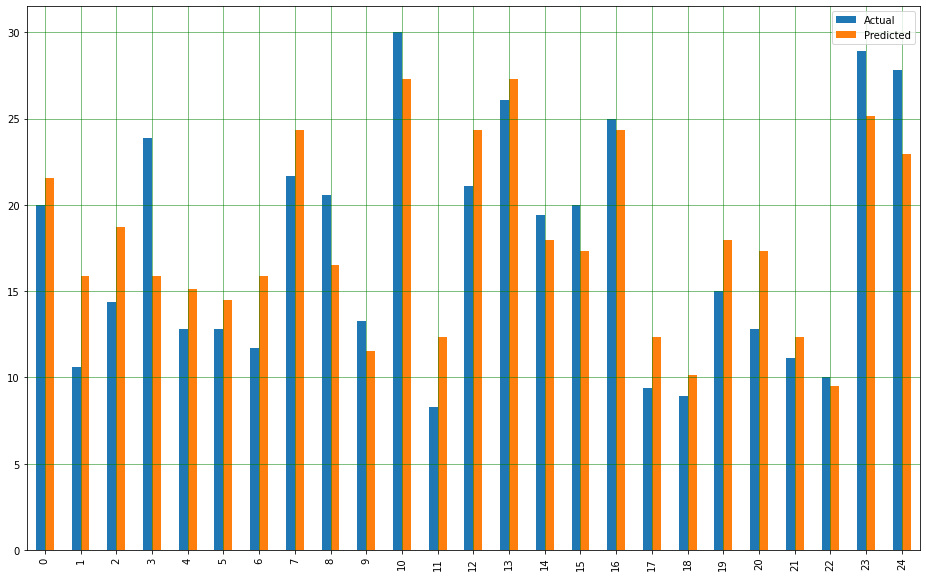

In [13]:
# plot prediction slice
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

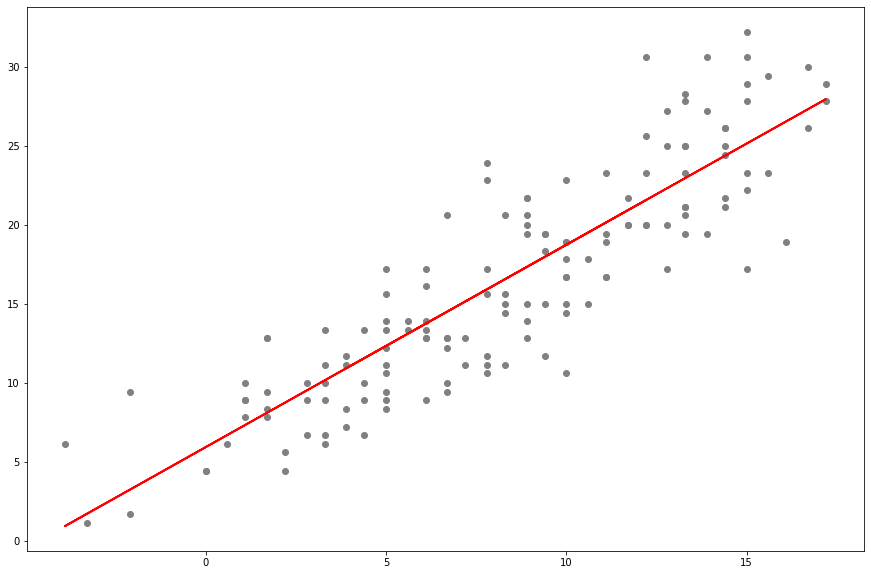

In [14]:
# Though our model is not very precise, the predicted percentages are close to the actual ones.
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred_l, color='red', linewidth=2)
plt.show()

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_l))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_l))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_l)))

Mean Absolute Error: 2.763926856207364
Mean Squared Error: 11.540405826789101
Root Mean Squared Error: 3.3971172818713664


You can see that the value of root mean squared error is 3.4494, which is more than 10% of the mean value of the percentages of all the temperature i.e. 16.439083. This means that our algorithm was not very accurate but can still make reasonably good predictions.

## Ridge regression on our dataset

In [16]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso

In [17]:
ridge_reg = Ridge(alpha=100)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [18]:
#To retrieve the intercept:
print(ridge_reg.intercept_)

#For retrieving the slope:
print(ridge_reg.coef_)

[5.94505494]
[[1.2771546]]


In [19]:
y_pred_r = ridge_reg.predict(X_test)

In [20]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_r.flatten()})
df

,Actual,Predicted
0,20.0,21.526341
1,10.6,15.906861
2,14.4,18.716601
3,23.9,15.906861
4,12.8,15.140568
...,...,...
142,21.7,17.311731
143,27.2,23.697504
144,23.3,20.121471
145,12.8,14.501991


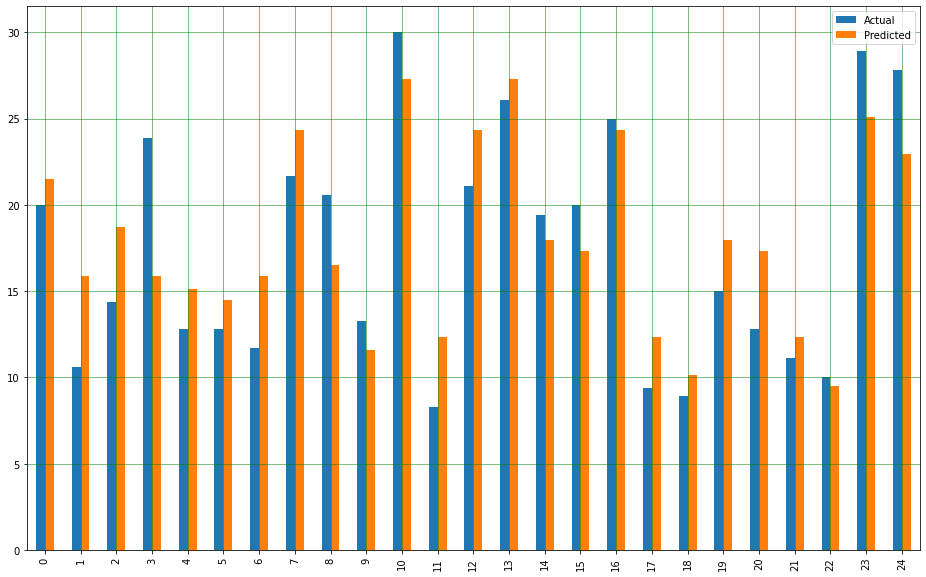

In [21]:
df2 = df.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

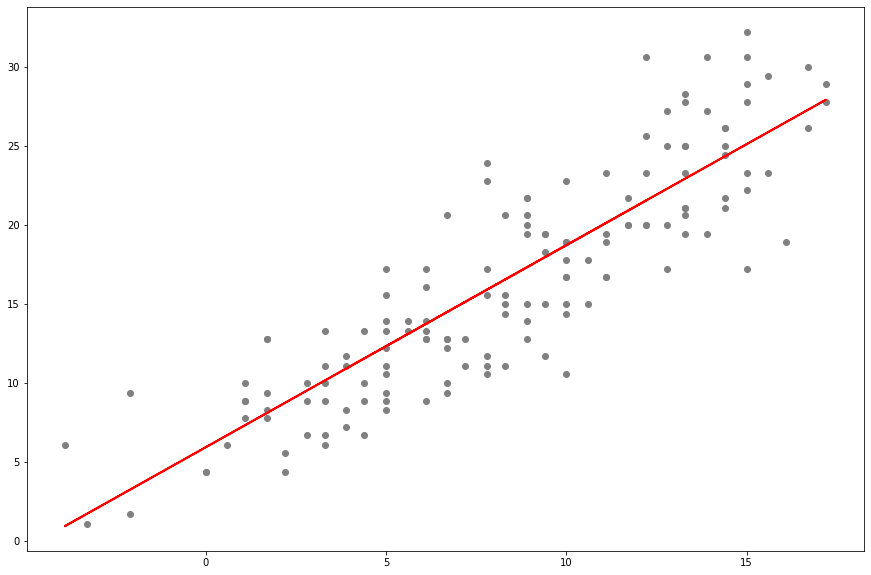

In [22]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred_r, color='red', linewidth=2)
plt.show()

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_r))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_r))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_r)))

Mean Absolute Error: 2.764663342662989
Mean Squared Error: 11.541396382770046
Root Mean Squared Error: 3.3972630723525143


# Compare plot

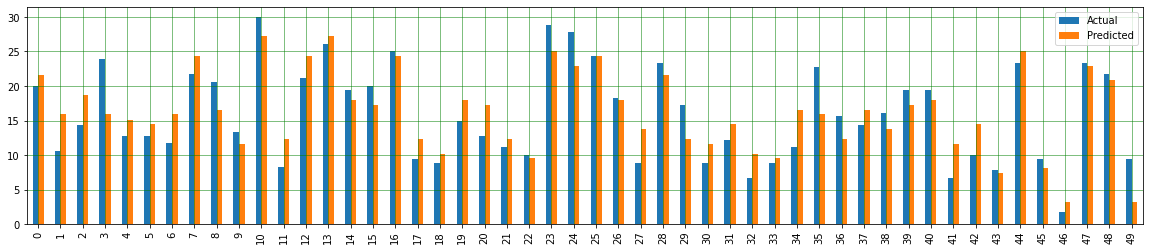

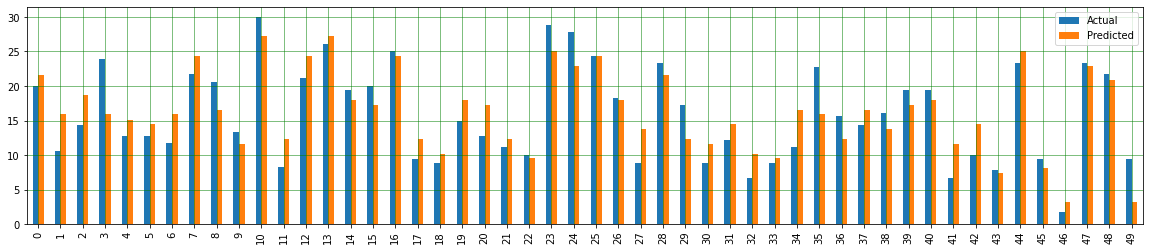

In [24]:
# bar compare
number_compare = 50
df1 = df.head(number_compare)
df2 = df.head(number_compare)
df1.plot(kind='bar',figsize=(20,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

df2.plot(kind='bar',figsize=(20,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

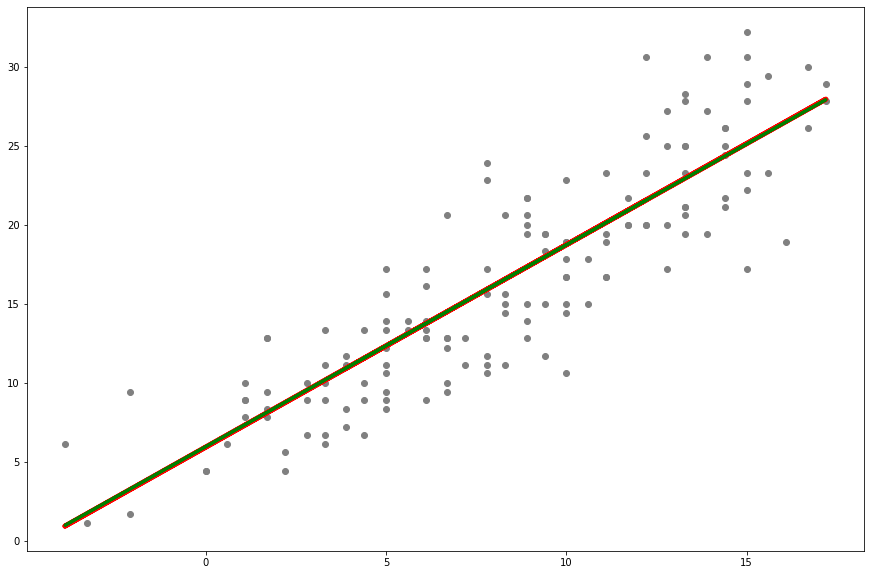

In [25]:
# regression plot compare
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred_l, color='red', linewidth=5)
plt.plot(X_test, y_pred_r, color='green', linewidth=3)
plt.show()